### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- CustomerID: 고객 번호
- PurchaseDate: 구매 날짜
- TransactionAmount: 결제 금액 
- ProductInformation: 상품 정보
- OrderID: 주문 번호
- Location: 주문 지역

In [1]:
import pandas as pd

od_df = pd.read_csv("https://github.com/qnsekddl1/study-ai/files/14784884/customer_order_data.csv")
display(od_df)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [2]:
# DataFrame의 정보 확인

od_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [3]:
# DataFrame의 중복 행 검사
od_df.duplicated().sum()

0

In [4]:
# DataFrame의 결측치 검사
od_df.isna().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [5]:
# 'ProductInformation' 의 종류와 갯수 파악
od_df['ProductInformation'].value_counts()

ProductInformation
Product C    277
Product D    253
Product B    245
Product A    225
Name: count, dtype: int64

In [6]:
# 'Location'의 종류와 개수 파악
od_df['Location'].value_counts()

Location
Tokyo       278
New York    247
London      246
Paris       229
Name: count, dtype: int64

In [7]:
# Frequenccy 대체
od_df_Fre = od_df['CustomerID'].value_counts().reset_index()
od_df_Fre

,CustomerID,count
0,7363,3
1,4804,3
2,5557,3
3,1519,2
4,5634,2
...,...,...
941,1341,1
942,8822,1
943,9442,1
944,5706,1


In [8]:
od_df['PurchaseDate'].value_counts()

PurchaseDate
2023-05-04    27
2023-05-29    24
2023-05-10    23
2023-04-27    23
2023-04-13    23
              ..
2023-05-21     9
2023-05-18     9
2023-04-11     8
2023-04-20     8
2023-05-12     7
Name: count, Length: 61, dtype: int64

In [9]:
od_df['PurchaseDate'] = pd.to_datetime(od_df['PurchaseDate'])
od_df.sort_values(['PurchaseDate'], ascending=False)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
999,4759,2023-06-10,804.28,Product D,467544,New York
990,6570,2023-06-10,125.84,Product C,664032,Paris
981,6761,2023-06-10,571.97,Product B,690462,London
982,3213,2023-06-10,700.65,Product B,719531,Tokyo
983,2625,2023-06-10,765.11,Product B,377501,New York
...,...,...,...,...,...,...
1,2188,2023-04-11,463.70,Product A,176819,London
5,8483,2023-04-11,375.23,Product C,691194,Paris
6,8317,2023-04-11,272.56,Product B,826847,New York
7,6911,2023-04-11,433.33,Product C,963918,Tokyo


In [10]:
od_df['PurchaseDate'].dtype

dtype('<M8[ns]')

In [11]:
od_df['PurchaseDate'][::-1]

999   2023-06-10
998   2023-06-10
997   2023-06-10
996   2023-06-10
995   2023-06-10
         ...    
4     2023-04-11
3     2023-04-11
2     2023-04-11
1     2023-04-11
0     2023-04-11
Name: PurchaseDate, Length: 1000, dtype: datetime64[ns]

In [12]:
# Recency 구하는 법
od_df['PurchaseDate'] = 12 - od_df['PurchaseDate'].dt.month
od_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,8,943.31,Product C,890075,Tokyo
1,2188,8,463.70,Product A,176819,London
2,4608,8,80.28,Product A,340062,New York
3,2559,8,221.29,Product A,239145,London
4,9482,8,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,6,759.62,Product B,275284,London
996,6669,6,941.50,Product C,987025,New York
997,8836,6,545.36,Product C,512842,London
998,1440,6,729.94,Product B,559753,Paris


In [13]:
od_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,8,943.31,Product C,890075,Tokyo
1,2188,8,463.70,Product A,176819,London
2,4608,8,80.28,Product A,340062,New York
3,2559,8,221.29,Product A,239145,London
4,9482,8,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,6,759.62,Product B,275284,London
996,6669,6,941.50,Product C,987025,New York
997,8836,6,545.36,Product C,512842,London
998,1440,6,729.94,Product B,559753,Paris


In [14]:
od_df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
CustomerID,8814,2188,4608,2559,9482,8483,8317,6911,8993,3519,...,6570,1029,5938,1990,4982,2970,6669,8836,1440,4759
PurchaseDate,8,8,8,8,8,8,8,8,8,8,...,6,6,6,6,6,6,6,6,6,6
TransactionAmount,943.31,463.7,80.28,221.29,739.56,375.23,272.56,433.33,16.55,464.63,...,125.84,704.99,219.12,791.4,624.79,759.62,941.5,545.36,729.94,804.28
ProductInformation,Product C,Product A,Product A,Product A,Product A,Product C,Product B,Product C,Product D,Product C,...,Product C,Product D,Product B,Product C,Product B,Product B,Product C,Product C,Product B,Product D
OrderID,890075,176819,340062,239145,194545,691194,826847,963918,112426,139726,...,664032,992083,901280,759104,972881,275284,987025,512842,559753,467544
Location,Tokyo,London,New York,London,Paris,Paris,New York,Tokyo,New York,New York,...,Paris,New York,Paris,Tokyo,Paris,London,New York,London,Paris,New York


In [15]:
print(type(od_df.T.loc[['TransactionAmount','CustomerID']]))

<class 'pandas.core.frame.DataFrame'>


In [16]:
od_df.T.loc[['CustomerID', 'TransactionAmount']].T

,CustomerID,TransactionAmount
0,8814,943.31
1,2188,463.7
2,4608,80.28
3,2559,221.29
4,9482,739.56
...,...,...
995,2970,759.62
996,6669,941.5
997,8836,545.36
998,1440,729.94


In [17]:
# Monetary

od_df_D = od_df.T.loc[['CustomerID', 'TransactionAmount']].T
od_df_D = od_df_D.groupby('CustomerID').sum().reset_index()

In [18]:
od_df_D

,CustomerID,TransactionAmount
0,1011,1129.02
1,1025,359.29
2,1029,704.99
3,1046,859.82
4,1049,225.72
...,...,...
941,9941,960.53
942,9950,679.11
943,9954,798.01
944,9985,36.1


In [19]:
# Frequency

od_df_Fre = od_df_Fre.sort_values(by='CustomerID', ascending=True).reset_index(drop=True)
od_df_Fre

,CustomerID,count
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1
...,...,...
941,9941,1
942,9950,1
943,9954,1
944,9985,1


In [20]:
# Recency

od_df_R = od_df[['CustomerID', 'PurchaseDate']]
od_df_R = od_df_R.groupby('CustomerID').min().reset_index()
od_df_R

,CustomerID,PurchaseDate
0,1011,7
1,1025,7
2,1029,6
3,1046,8
4,1049,7
...,...,...
941,9941,8
942,9950,7
943,9954,7
944,9985,8


In [21]:
od_df = od_df[~ od_df.duplicated('CustomerID')]
od_df.reset_index(drop=True, inplace=True)
od_df = od_df.sort_values(by='CustomerID', ascending=True).reset_index(drop=True)
od_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,1011,7,918.72,Product B,945619,London
1,1025,7,359.29,Product D,296412,New York
2,1029,6,704.99,Product D,992083,New York
3,1046,8,859.82,Product B,236306,Paris
4,1049,7,225.72,Product A,147489,Tokyo
...,...,...,...,...,...,...
941,9941,8,960.53,Product B,412534,Paris
942,9950,7,679.11,Product C,739711,Tokyo
943,9954,7,798.01,Product B,106687,Tokyo
944,9985,8,36.10,Product D,649435,New York


In [22]:
od_df['Recency'] = od_df_R['PurchaseDate']
od_df['Frequency'] = od_df_Fre['count']
od_df['Monetary'] = od_df_D['TransactionAmount']
od_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary
0,1011,7,918.72,Product B,945619,London,7,2,1129.02
1,1025,7,359.29,Product D,296412,New York,7,1,359.29
2,1029,6,704.99,Product D,992083,New York,6,1,704.99
3,1046,8,859.82,Product B,236306,Paris,8,1,859.82
4,1049,7,225.72,Product A,147489,Tokyo,7,1,225.72
...,...,...,...,...,...,...,...,...,...
941,9941,8,960.53,Product B,412534,Paris,8,1,960.53
942,9950,7,679.11,Product C,739711,Tokyo,7,1,679.11
943,9954,7,798.01,Product B,106687,Tokyo,7,1,798.01
944,9985,8,36.10,Product D,649435,New York,8,1,36.1


In [23]:
od_rfm_df = od_df[['Recency', 'Frequency', 'Monetary']]

od_rfm_df

,Recency,Frequency,Monetary
0,7,2,1129.02
1,7,1,359.29
2,6,1,704.99
3,8,1,859.82
4,7,1,225.72
...,...,...,...
941,8,1,960.53
942,7,1,679.11
943,7,1,798.01
944,8,1,36.1


In [24]:
from sklearn.preprocessing import MinMaxScaler

normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(od_rfm_df)

In [25]:
od_rfm_df = pd.DataFrame(rfm_normalization, columns=od_rfm_df.columns)

od_rfm_df

,Recency,Frequency,Monetary
0,0.5,0.5,0.471795
1,0.5,0.0,0.146647
2,0.0,0.0,0.292677
3,1.0,0.0,0.358080
4,0.5,0.0,0.090224
...,...,...,...
941,1.0,0.0,0.400622
942,0.5,0.0,0.281745
943,0.5,0.0,0.331970
944,1.0,0.0,0.010125


In [26]:
od_df['TotalScore'] = od_rfm_df['Recency'] + od_rfm_df['Frequency'] + od_rfm_df['Monetary']
od_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary,TotalScore
0,1011,7,918.72,Product B,945619,London,7,2,1129.02,1.471795
1,1025,7,359.29,Product D,296412,New York,7,1,359.29,0.646647
2,1029,6,704.99,Product D,992083,New York,6,1,704.99,0.292677
3,1046,8,859.82,Product B,236306,Paris,8,1,859.82,1.358080
4,1049,7,225.72,Product A,147489,Tokyo,7,1,225.72,0.590224
...,...,...,...,...,...,...,...,...,...,...
941,9941,8,960.53,Product B,412534,Paris,8,1,960.53,1.400622
942,9950,7,679.11,Product C,739711,Tokyo,7,1,679.11,0.781745
943,9954,7,798.01,Product B,106687,Tokyo,7,1,798.01,0.831970
944,9985,8,36.10,Product D,649435,New York,8,1,36.1,1.010125


In [27]:
import numpy as np

l1, l2, l3, l4 = np.percentile(od_df['TotalScore'], [25, 55, 75, 95])
print(l1, l2, l3, l4)

0.5930598736123549 0.8521841153709679 1.1542989540915465 1.3863039217342816


In [28]:
def get_level(x):
    if x <= l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3:
        return 3
    if x > l3 and x <= l4:
        return 2
    return 1

In [29]:
od_df['Level'] = od_df['TotalScore'].apply(get_level)
od_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary,TotalScore,Level
0,1011,7,918.72,Product B,945619,London,7,2,1129.02,1.471795,1
1,1025,7,359.29,Product D,296412,New York,7,1,359.29,0.646647,4
2,1029,6,704.99,Product D,992083,New York,6,1,704.99,0.292677,5
3,1046,8,859.82,Product B,236306,Paris,8,1,859.82,1.358080,2
4,1049,7,225.72,Product A,147489,Tokyo,7,1,225.72,0.590224,5
...,...,...,...,...,...,...,...,...,...,...,...
941,9941,8,960.53,Product B,412534,Paris,8,1,960.53,1.400622,1
942,9950,7,679.11,Product C,739711,Tokyo,7,1,679.11,0.781745,4
943,9954,7,798.01,Product B,106687,Tokyo,7,1,798.01,0.831970,4
944,9985,8,36.10,Product D,649435,New York,8,1,36.1,1.010125,3


In [30]:
od_df['Level'] = od_df['Level'].replace([5, 4, 3, 2, 1],['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])


In [31]:
od_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary,TotalScore,Level
0,1011,7,918.72,Product B,945619,London,7,2,1129.02,1.471795,VIP
1,1025,7,359.29,Product D,296412,New York,7,1,359.29,0.646647,Silver
2,1029,6,704.99,Product D,992083,New York,6,1,704.99,0.292677,Bronze
3,1046,8,859.82,Product B,236306,Paris,8,1,859.82,1.358080,Diamond
4,1049,7,225.72,Product A,147489,Tokyo,7,1,225.72,0.590224,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
941,9941,8,960.53,Product B,412534,Paris,8,1,960.53,1.400622,VIP
942,9950,7,679.11,Product C,739711,Tokyo,7,1,679.11,0.781745,Silver
943,9954,7,798.01,Product B,106687,Tokyo,7,1,798.01,0.831970,Silver
944,9985,8,36.10,Product D,649435,New York,8,1,36.1,1.010125,Gold


In [32]:
od_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary,TotalScore,Level
0,1011,7,918.72,Product B,945619,London,7,2,1129.02,1.471795,VIP
1,1025,7,359.29,Product D,296412,New York,7,1,359.29,0.646647,Silver
2,1029,6,704.99,Product D,992083,New York,6,1,704.99,0.292677,Bronze
3,1046,8,859.82,Product B,236306,Paris,8,1,859.82,1.358080,Diamond
4,1049,7,225.72,Product A,147489,Tokyo,7,1,225.72,0.590224,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
941,9941,8,960.53,Product B,412534,Paris,8,1,960.53,1.400622,VIP
942,9950,7,679.11,Product C,739711,Tokyo,7,1,679.11,0.781745,Silver
943,9954,7,798.01,Product B,106687,Tokyo,7,1,798.01,0.831970,Silver
944,9985,8,36.10,Product D,649435,New York,8,1,36.1,1.010125,Gold


<Axes: xlabel='Level', ylabel='count'>

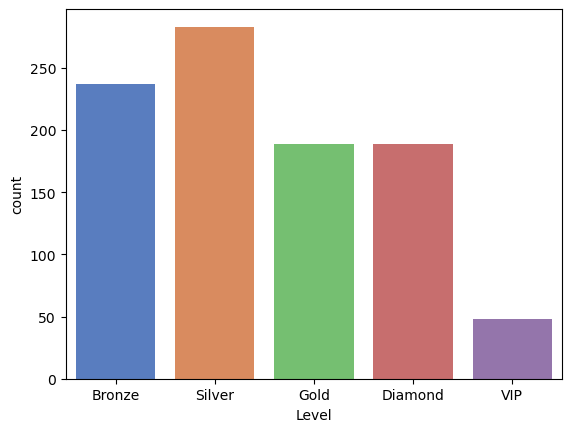

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(x='Level', data=od_df, palette='muted', order=order_columns)

<Axes: xlabel='Level', ylabel='TransactionAmount'>

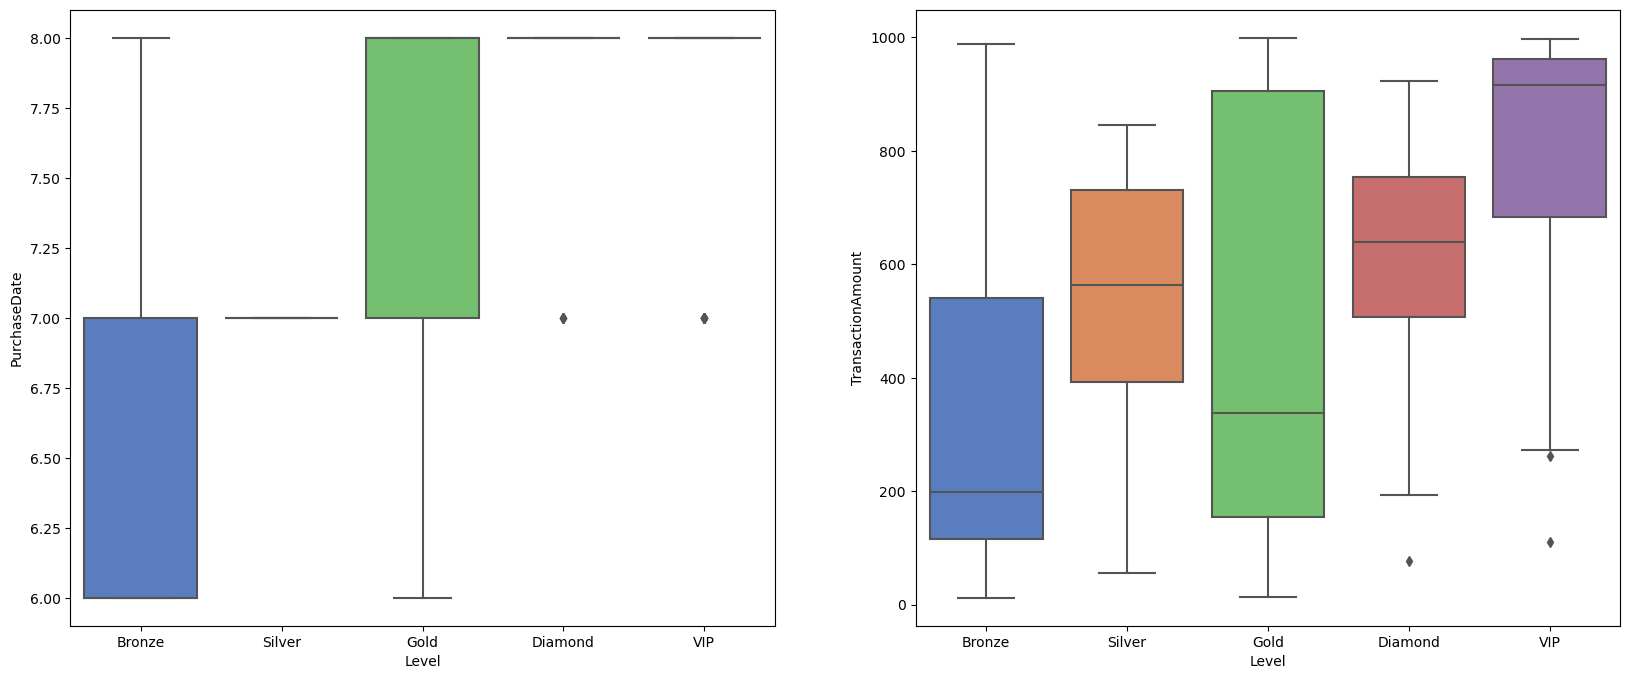

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.boxplot(ax=axes[0], x='Level', y='PurchaseDate', data=od_df, palette='muted', order=order_columns)
sns.boxplot(ax=axes[1], x='Level', y='TransactionAmount', data=od_df, palette='muted', order=order_columns)

<Axes: xlabel='ProductInformation', ylabel='count'>

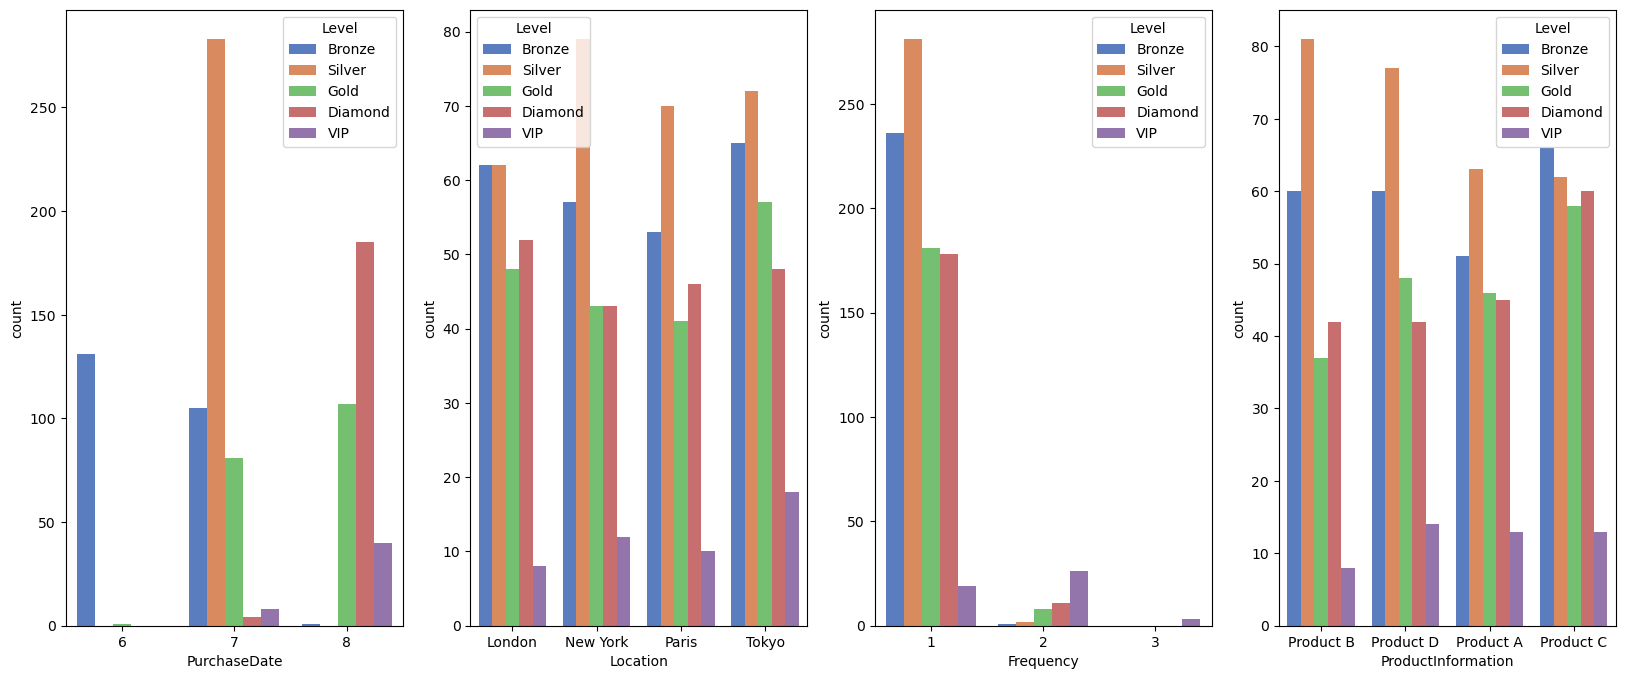

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(ax=axes[0], x='PurchaseDate', hue='Level', data=od_df, palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[1], x='Location', hue='Level', data=od_df, palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[2], x='Frequency', hue='Level', data=od_df, palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[3], x='ProductInformation', hue='Level', data=od_df, palette='muted', hue_order=order_columns)

### 마케팅 전략

> - 각 등급별 구매 빈도수를 확인 해보면, 제일 먼저 지속적인 구매 유발을 일으키는 것입니다. 대부분의 회원들의 구매가 1번 내지 2번 정도입니다. 이런한 부분을 개선 하기 위해선 내부적으론 쿠폰 이벤트, 웹사이트 또는 어플리케이션의 방문출석과 같은 끊임 없이 확인을 해서 혜택을 얻는 장치를 마련해야하고, 외부적은 미디어의 노출 빈도수를 높임으로서 회원들이나, 일반인들에게 꾸준한 어필이 필요로 해보입니다.
> - 그 다음으론 구매 금액이 가장 높은 'Gold' 등급을 위해 특정 캠페인을 진행하여 회원의 지속적인 소비를 촉진시켜야 합니다.
> - 그리고 회원등급 중 가장 많은 인원들이 속해 있지만 구매금액이 비교적 낮은 'Silver' 등급의 소비를 촉진시킬 수 있는 방안으로 캠페인을 진행하여야합니다.
> - 그리고 회원 등급이 높은 'Diamond', 'VIP' 회원들에게는 특별한 상품을 우선적으로 구매할 수 있는 기회를 줌으로서 보다 더 많은 소비를 할 수 있게 유도하는 것도 좋은 마케팅 전략이 될 수 있을 것입니다.
> - 앞으로의 소비 패턴들도 지속적으로 파악해서 적절한 마케팅 전략을 재정립 하고 발빠르게 대처해 나가야할 것입니다. 

od_df[~ od_df.duplicated('CustomerID')]: 'CustomerID' 열을 기준으로 중복된 행을 제거합니다. ~ 연산자는 중복되지 않은 행을 선택합니다. 이를 통해 중복된 'CustomerID'를 가진 행들이 제거됩니다.

reset_index(drop=True, inplace=True): 인덱스를 재설정합니다. drop=True로 설정되어 있으므로 이전 인덱스는 삭제됩니다. inplace=True로 설정되어 있으므로 변경 사항이 DataFrame에 직접 적용됩니다.

od_df.sort_values(by='CustomerID', ascending=True): 'CustomerID' 열을 기준으로 DataFrame을 오름차순으로 정렬합니다.

reset_index(drop=True): 정렬된 DataFrame의 인덱스를 다시 설정합니다. drop=True로 설정되어 있으므로 이전 인덱스는 삭제됩니다. 이렇게 하면 인덱스가 새롭게 생성되고, 새로운 DataFrame이 생성됩니다.

sort_values(by='CustomerID', ascending=True): DataFrame을 'CustomerID' 열을 기준으로 오름차순으로 정렬합니다. ascending=True로 설정되어 있으므로 오름차순으로 정렬됩니다.

reset_index(drop=True): 정렬된 DataFrame의 인덱스를 다시 설정합니다. drop=True로 설정되어 있으므로 이전 인덱스는 삭제됩니다. 이렇게 하면 인덱스가 새롭게 생성되고, 새로운 DataFrame이 생성됩니다.